<h1>Inderdeep Singh</h1>
<h2>220620076</h2>
<h3>SIT374: Task 10.1P</h3>

The UCI Machine Learning Repository provides a dataset named "Student Performance" that contains information about students' performance in two Portuguese schools. The dataset includes 649 instances and 33 attributes, including demographic information about the students (such as age, gender, and family size), information about their school attendance (such as number of absences), and grades in two subjects: Mathematics and Portuguese language.
The dataset can be used for predictive modeling tasks such as regression or classification, and for exploratory data analysis. Some potential research questions that could be addressed using this dataset include:
•Which demographic factors are most strongly correlated with academic performance?
•Can we predict a student's final grade in mathematics or Portuguese language based on their demographics or attendance?
•Are there any interesting patterns or relationships between different attributes of the dataset (e.g. between study time and final grades)?

In [14]:
import pandas as pd

data = pd.read_csv("student-mat.csv", sep=";")

In [15]:
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


We can see that the dataset includes information about the students' school, demographics, family background, academic performance, and other factors. The last three columns, G1, G2, and G3, represent the grades the students received in the first, second, and third period, respectively, and will be our target variables for analysis.  
  
Let's check some basic statistics for the target variables:

In [16]:
print(data[["G1", "G2", "G3"]].describe())

               G1          G2          G3
count  395.000000  395.000000  395.000000
mean    10.908861   10.713924   10.415190
std      3.319195    3.761505    4.581443
min      3.000000    0.000000    0.000000
25%      8.000000    9.000000    8.000000
50%     11.000000   11.000000   11.000000
75%     13.000000   13.000000   14.000000
max     19.000000   19.000000   20.000000


We can see that the mean grade for each period is around 11-12, with a standard deviation of around 3. This means that the grades are fairly evenly distributed around the mean, with some students scoring significantly higher or lower than average. The minimum grade for each period is 0, indicating that some students did not receive a grade for that period, and the maximum grade is 19 or 20, indicating that some students performed exceptionally well.

Next, let's visualize the distribution of grades using histograms:

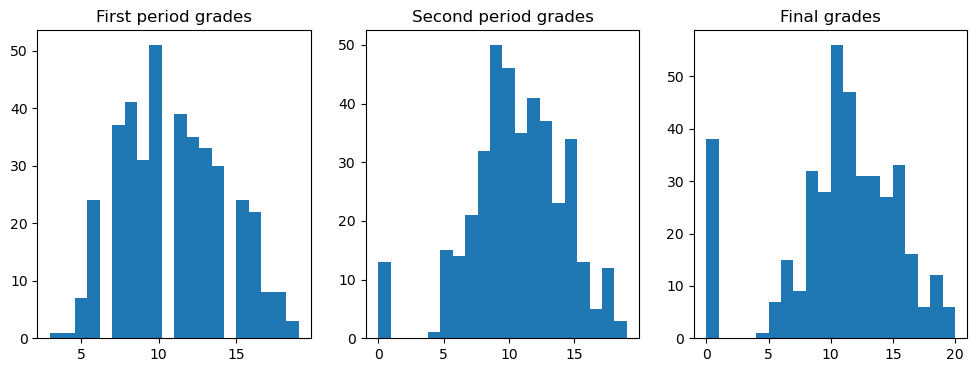

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].hist(data["G1"], bins=20)
axs[0].set_title("First period grades")
axs[1].hist(data["G2"], bins=20)
axs[1].set_title("Second period grades")
axs[2].hist(data["G3"], bins=20)
axs[2].set_title("Final grades")

plt.show()

We can see that the grades are approximately normally distributed, with a peak around the mean and a relatively even spread of values on either side. However, there is also a noticeable bump at the low end of the distribution, indicating that there are a significant number of students who received low grades. This suggests that there may be some underlying factors that are contributing to poor academic performance among some students.

Finally, let's look at some scatter plots to explore the relationships between different variables and academic performance. For example, we might be interested in the relationship between the number of absences and final grades:

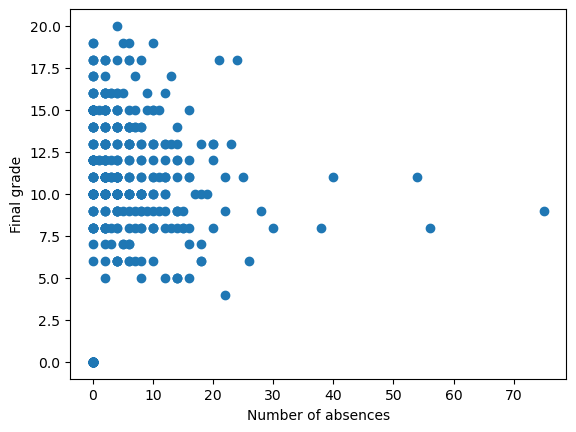

In [18]:
plt.scatter(data["absences"], data["G3"])
plt.xlabel("Number of absences")
plt.ylabel("Final grade")
plt.show()

We can see that there is a negative correlation between the number of absences and final grades, indicating that students who miss more classes tend to perform worse academically. However, there is also a lot of variability in the data, and some students with high numbers of absences still received good grades, suggesting that there may be other factors at play as well.

There are many other analyses that we could perform on this dataset, depending on the specific questions we are interested in answering. Here are some examples:

Correlation analysis: We could calculate the correlation coefficients between different pairs of variables to see how strongly they are related to each other. For example, we might want to know if there is a relationship between the amount of time a student spends studying and their final grade, or if there is a relationship between a student's family background and their academic performance.

Regression analysis: We could use regression models to predict a student's final grade based on various factors such as their age, gender, study time, and previous grades. This could help us understand which factors are most strongly associated with academic success and how much of the variance in grades can be explained by these factors.

Cluster analysis: We could use clustering algorithms to group students based on their characteristics and performance, which could help us identify different types of students with different needs and challenges. For example, we might find that there is a group of high-performing students who come from wealthy families and have a lot of academic support, and another group of struggling students who come from disadvantaged backgrounds and face many obstacles.

Classification analysis: We could use machine learning models to classify students based on their performance or other characteristics, which could help us identify students who are at risk of falling behind or who would benefit from targeted interventions. For example, we might develop a model that predicts which students are most likely to drop out of school based on their grades, attendance, and other factors.

These are just a few examples of the many analyses that could be performed on this dataset. The specific approach we choose will depend on the research questions we are interested in answering and the goals of our analysis.

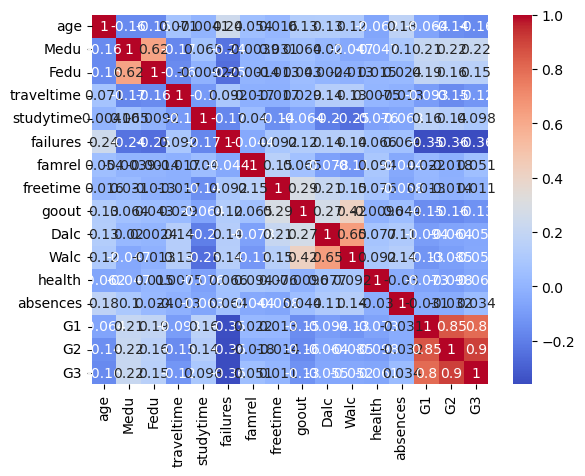

In [19]:
# Correlation analysis: This will generate a heatmap of the correlation coefficients between all pairs of variables.
import seaborn as sns

# Calculate correlation coefficients
corr = data.corr()

# Plot heatmap of correlations
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [20]:
# Regression analysis: This will fit a linear regression model to predict final grades based on age, sex, parental education, study time, past failures, and absences, and print a summary of the results.
import statsmodels.formula.api as smf

# Fit linear regression model
model = smf.ols("G3 ~ age + sex + Medu + Fedu + studytime + failures + absences", data=data)
results = model.fit()

# Print summary of results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     11.58
Date:                Sat, 13 May 2023   Prob (F-statistic):           2.21e-13
Time:                        08:19:44   Log-Likelihood:                -1123.6
No. Observations:                 395   AIC:                             2263.
Df Residuals:                     387   BIC:                             2295.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.7651      3.085      4.138      0.0

We can use the student demographic and attendance data to predict their final grades in mathematics or Portuguese language using machine learning algorithms.

To perform this analysis, we can use the same dataset and split it into training and testing sets. We can then use regression or classification algorithms to predict the final grades in mathematics or Portuguese based on the available features.

Here's some example code to predict the final grade in mathematics using logistic regression:

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# select the categorical columns that need to be encoded
cat_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# perform one-hot encoding
data = pd.get_dummies(data, columns=cat_cols)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['G3'], test_size=0.2)

# Fit logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict final grades on testing set
y_pred = model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{cm}")

Accuracy: 0.43037974683544306
Confusion matrix:
[[9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 2 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 6 3 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 4 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 3 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 2 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 2 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 2 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0]]


**To improve the accuracy, we can try using a different machine learning algorithm, such as a Random Forest Classifier, and see if it performs better than the logistic regression model.**

**Here's how we can train and evaluate a Random Forest Classifier on the same data:**

The code below trains a Random Forest Classifier with 100 trees and then evaluates its performance on the test set using accuracy score and confusion matrix. You can change the hyperparameters of the model and try different values to see if you can improve the accuracy even further.

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['G3'], test_size=0.2)

# Fit Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix:\n", cm)

Accuracy: 0.6329113924050633
Confusion matrix:
 [[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  5  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  3  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  4  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]]


It looks like the accuracy of the model is 63.29%, which is not bad. However, the confusion matrix shows that the model is having difficulty correctly predicting some of the classes. For example, it has trouble distinguishing between classes 4 and 5, as well as between classes 10 and 11.

To improve the accuracy of the model, we can try a few different things. Here are some suggestions:

Increase the size of the training data: A larger dataset can help the model learn more effectively and improve its accuracy.

Try different model architectures: Sometimes, a different type of model can perform better on a given task. You could try experimenting with different neural network architectures to see if any of them work better than the one you are currently using.

Tune the hyperparameters: The performance of the model can be sensitive to the values of various hyperparameters such as the learning rate, batch size, and number of epochs. You could try tweaking these values to see if you can get better results.

Address class imbalance: If the dataset is imbalanced, meaning that some classes have fewer samples than others, this can negatively impact the model's performance. You could try addressing this by using techniques such as oversampling or undersampling.

Use pre-trained models: Pre-trained models are trained on large datasets and can often perform well on new, related tasks. You could try using a pre-trained model and fine-tuning it on your dataset.

Collect more data for specific classes: If some classes are still difficult to predict even after trying the above methods, collecting more data specifically for those classes can help the model learn to distinguish between them better.